In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize']=17,8 #used to have a bigger graph
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import folium



In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()


In [3]:
df=pd.read_excel("C:\\Users\\staff\\Desktop\\Staffin\\Covid1-_DS\\COVID-19-Data-Analyisis-master\\Covid cases in India.xlsx")
df



,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,12,0,1,0
1,2,Chhattisgarh,6,0,0,0
2,3,Delhi,38,1,6,1
3,4,Gujarat,43,0,0,3
4,5,Haryana,16,14,11,0
5,6,Himachal Pradesh,4,0,0,1
6,7,Karnataka,20,0,3,2
7,8,Kerala,131,7,11,0
8,9,Madhya Pradesh,23,0,0,1
9,10,Maharashtra,144,3,15,4


In [421]:
#initially we have to decide which details we need and which details we don't need. Here we have 2 serial columns. So we will drop it

df.drop(['S. No.'],axis=1,inplace=True)  #axis =1 means we need to delete from col and not rows. "inplace is used to replace the original df with new one"

In [422]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,Andhra Pradesh,12,0,1,0
1,Chhattisgarh,6,0,0,0
2,Delhi,38,1,6,1
3,Gujarat,43,0,0,3
4,Haryana,16,14,11,0
5,Himachal Pradesh,4,0,0,1
6,Karnataka,20,0,3,2
7,Kerala,131,7,11,0
8,Madhya Pradesh,23,0,0,1
9,Maharashtra,144,3,15,4


In [423]:
#now we will find total number of cases and insert it as new column
df['Total Cases']=df['Total Confirmed cases (Indian National)']+df['Total Confirmed cases ( Foreign National )']
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases
0,Andhra Pradesh,12,0,1,0,12
1,Chhattisgarh,6,0,0,0,6
2,Delhi,38,1,6,1,39
3,Gujarat,43,0,0,3,43
4,Haryana,16,14,11,0,30
5,Himachal Pradesh,4,0,0,1,4
6,Karnataka,20,0,3,2,20
7,Kerala,131,7,11,0,138
8,Madhya Pradesh,23,0,0,1,23
9,Maharashtra,144,3,15,4,147


In [424]:
total_cases_overall=df['Total Cases'].sum()
print('The total cases in India is',total_cases_overall)

The total cases in India is 729


In [425]:
df['Active Cases']=df['Total Cases']-df['Cured']

In [426]:
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,33
3,Gujarat,43,0,0,3,43,43
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,4
6,Karnataka,20,0,3,2,20,17
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,23
9,Maharashtra,144,3,15,4,147,132


In [427]:
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,33
3,Gujarat,43,0,0,3,43,43
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,4
6,Karnataka,20,0,3,2,20,17
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,23
9,Maharashtra,144,3,15,4,147,132


In [428]:
Total_Active_Cases=df.groupby('Name of State / UT')['Active Cases'].sum().sort_values(ascending=False).to_frame()
#no descending function is there. We also need to use .sum function

In [429]:
Total_Active_Cases.style.background_gradient(cmap="Reds")

,Active Cases
Name of State / UT,
Maharashtra,132
Kerala,127
Telengana,44
Gujarat,43
Rajasthan,40
Tamil Nadu,34
Delhi,33
Uttar Pradesh,32
Punjab,29


In [430]:
#Now graphical representation

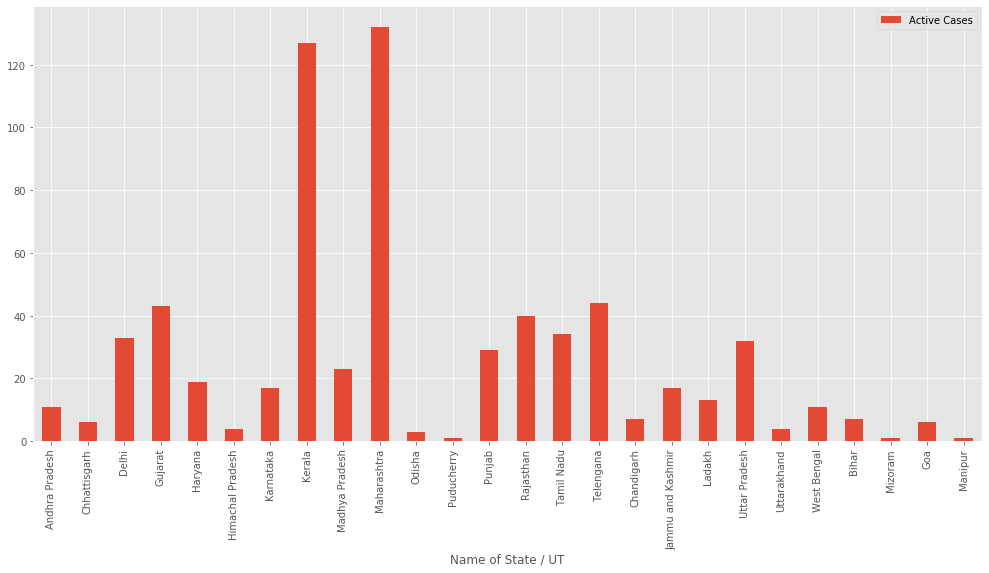

In [431]:
#using pandas and iplot

#pandas
df.plot(kind='bar',x='Name of State / UT',y='Active Cases')
plt.show()
df.iplot(kind='bar',x='Name of State / UT',y='Active Cases')


In [432]:
# using plotly express
px.bar(df,x='Name of State / UT',y='Active Cases')


In [433]:
# using scatter plot

#By plotly
df.iplot(kind='scatter',x='Name of State / UT',y='Total Cases',mode='markers+lines',title='Covid_19_graph',xTitle='Name of state',yTitle='Total Cases')

#using plotly express



In [434]:
#matplotlib oobject oriented. This gives us full control of the graph.. like changing size

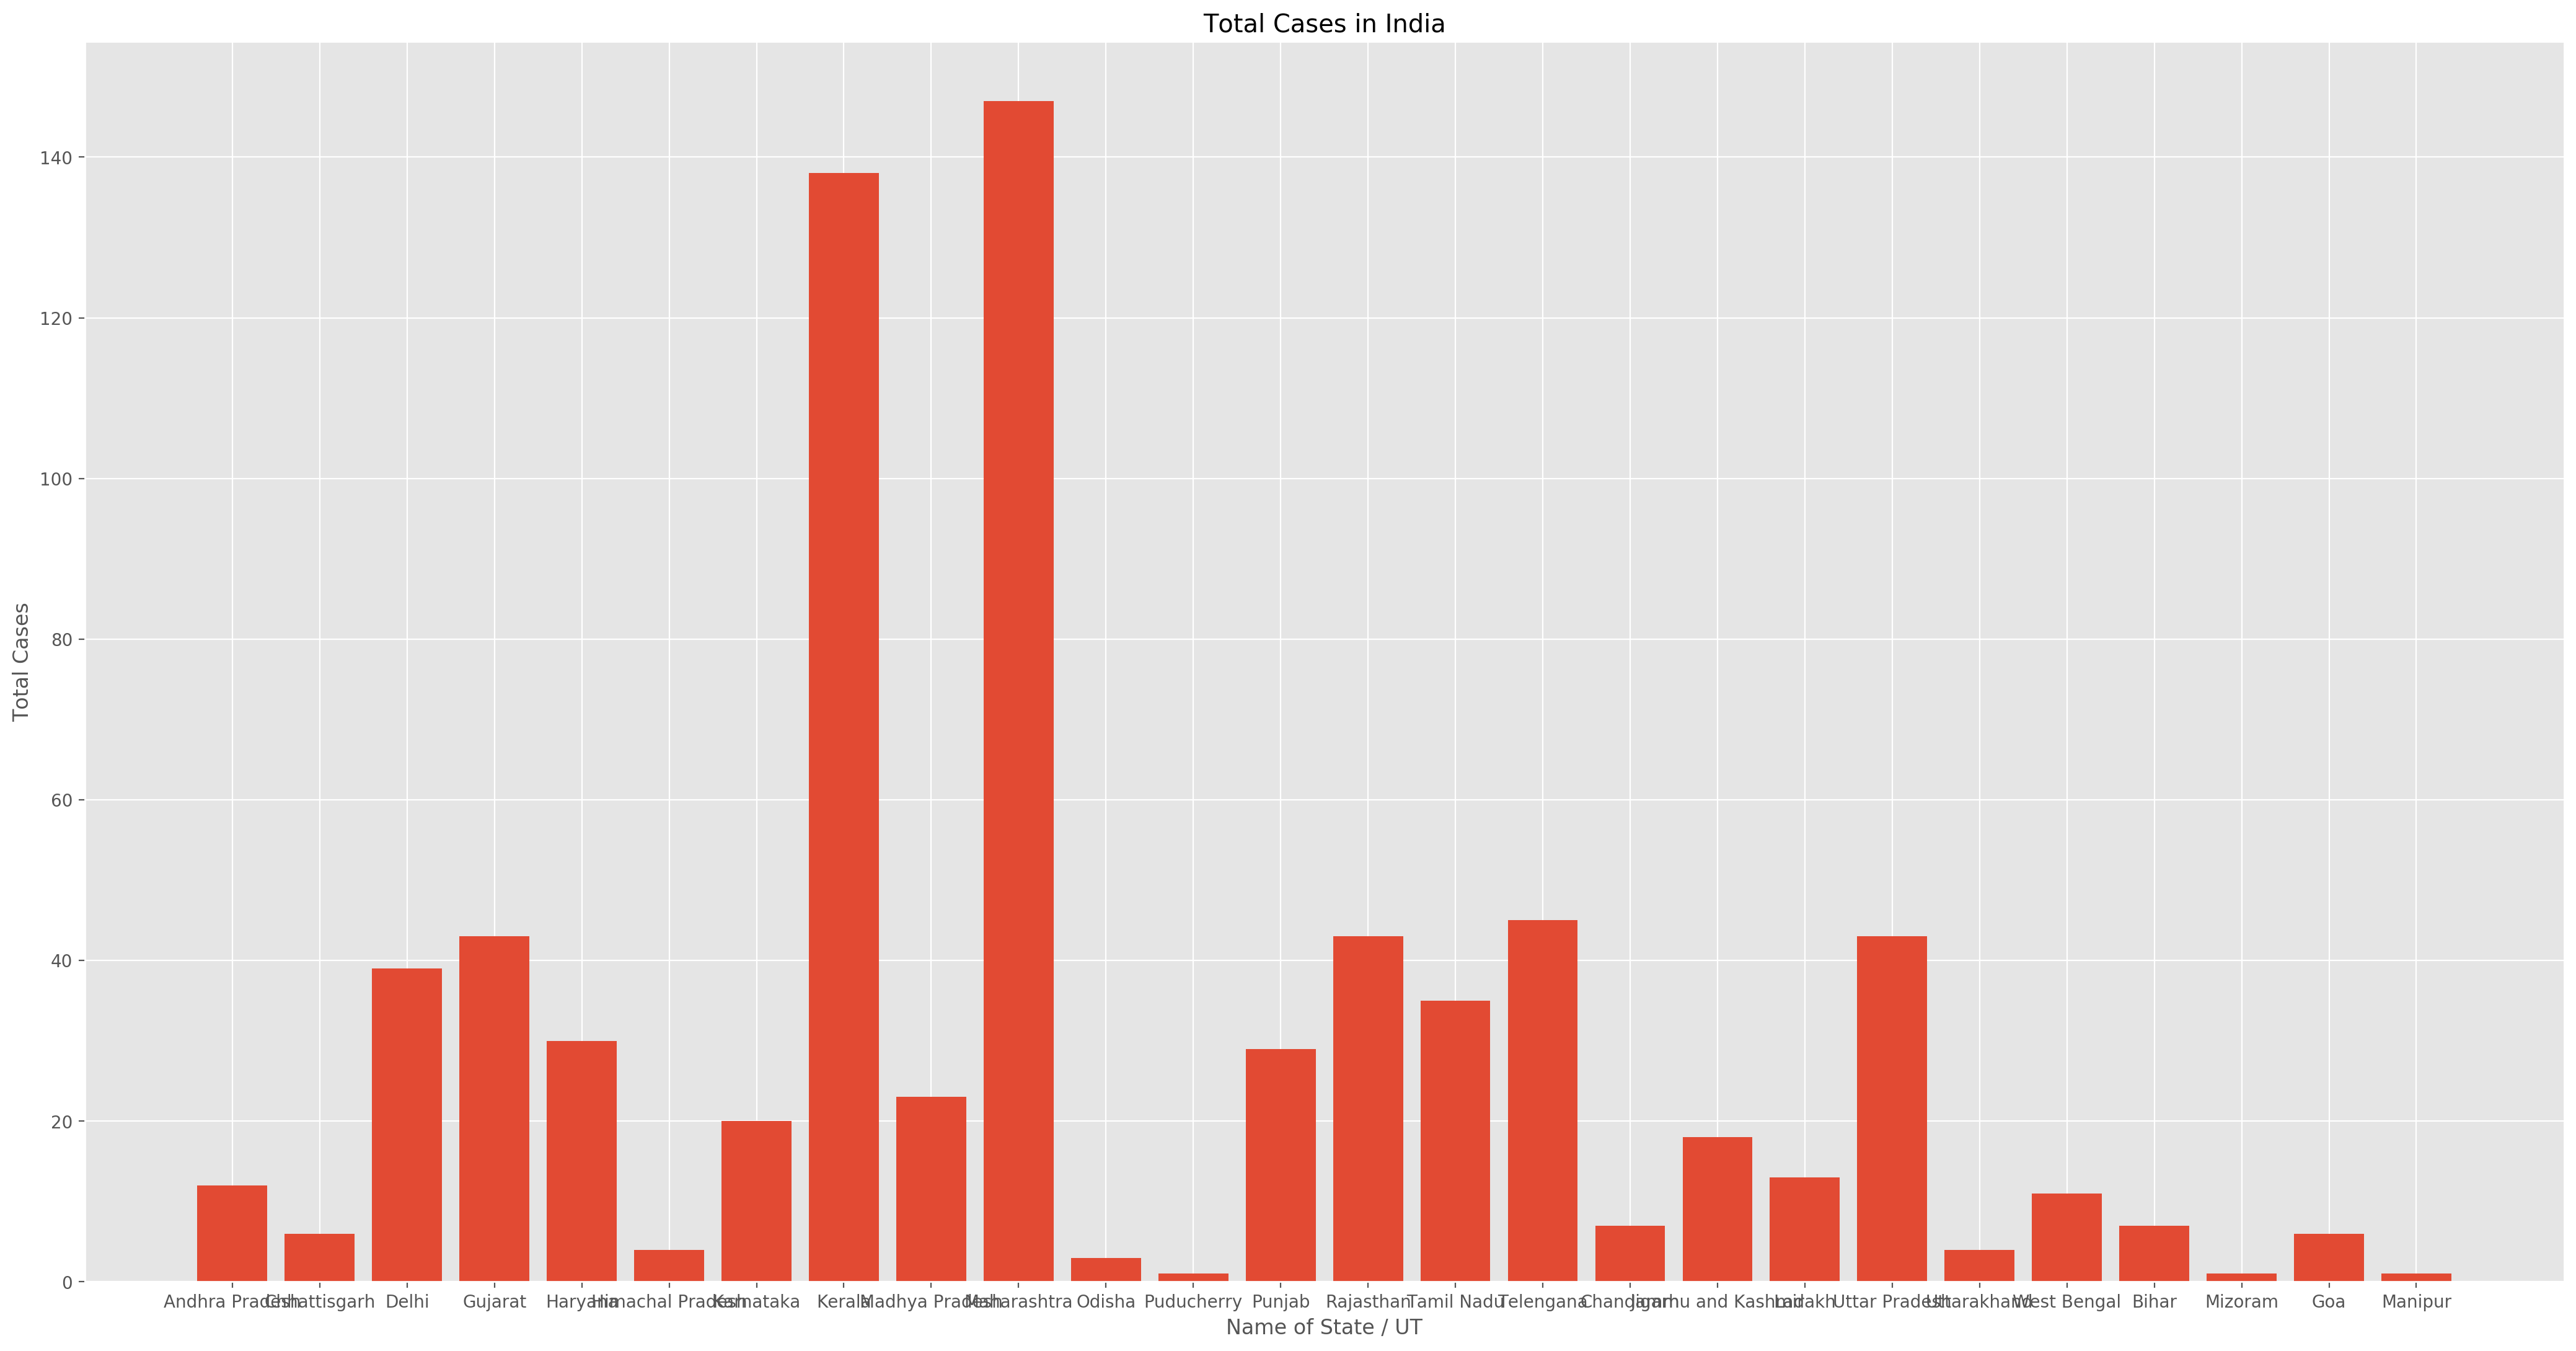

In [435]:
fig=plt.figure(figsize=(20,10),dpi=200)
axes=fig.add_axes([0,0,1,1])
axes.bar(df['Name of State / UT'],df['Total Cases'])
axes.set_title("Total Cases in India")
axes.set_xlabel("Name of State / UT")
axes.set_ylabel("Total Cases")
plt.show()

#plotly
fig=go.Figure()
fig.add_trace(go.Bar(x=df['Name of State / UT'],y=df['Total Cases']))
fig.update_layout(title='Total Cases in India',xaxis=dict(title='Name of State / UT'),yaxis=dict(title='Total Cases'))

In [436]:
Indian_Cord=pd.read_excel("C:\\Users\\staff\\Desktop\\Staffin\\Covid1-_DS\\COVID-19-Data-Analyisis-master\\\Indian Coordinates.xlsx")
Indian_Cord



,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [437]:
df_full=pd.merge(Indian_Cord,df,on='Name of State / UT')
df

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total Cases,Active Cases
0,Andhra Pradesh,12,0,1,0,12,11
1,Chhattisgarh,6,0,0,0,6,6
2,Delhi,38,1,6,1,39,33
3,Gujarat,43,0,0,3,43,43
4,Haryana,16,14,11,0,30,19
5,Himachal Pradesh,4,0,0,1,4,4
6,Karnataka,20,0,3,2,20,17
7,Kerala,131,7,11,0,138,127
8,Madhya Pradesh,23,0,0,1,23,23
9,Maharashtra,144,3,15,4,147,132


In [438]:
#Maps.. Different tiles are available. Here we are using Stamenterrain

#20,70 is indian lat and long, zoom_start zooms at a particular range in starting,tiles is the style type

map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')  
for lat,long,value, name in zip(df_full['Latitude'],df_full['Longitude'],df_full['Total Cases'],df_full['Name of State / UT']):
    folium.CircleMarker([lat,long],radius=value*0.8,popup=('<strong>State</strong>: '+str(name).capitalize()+'<br>''<strong>Total Cases</strong>: ' + str(value)+ '<br>'),color='red',fill_color='red',fill_opacity=0.3).add_to(map)

map

In [439]:
#How corona virus is increasing globally

In [440]:
dbd_India=pd.read_excel("C:\\Users\\staff\\Desktop\\Staffin\\Covid1-_DS\\COVID-19-Data-Analyisis-master\\per_day_cases.xlsx",parse_dates=True,sheet_name="India")
#dbd_India
dbd_Italy=pd.read_excel("C:\\Users\\staff\\Desktop\\Staffin\\Covid1-_DS\\COVID-19-Data-Analyisis-master\\per_day_cases.xlsx",parse_dates=True,sheet_name="Italy")
dbd_Korea=pd.read_excel("C:\\Users\\staff\\Desktop\\Staffin\\Covid1-_DS\\COVID-19-Data-Analyisis-master\\per_day_cases.xlsx",parse_dates=True,sheet_name="Korea")
#dbd_Korea
dbd_Wuhan=pd.read_excel("C:\\Users\\staff\\Desktop\\Staffin\\Covid1-_DS\\COVID-19-Data-Analyisis-master\\per_day_cases.xlsx",parse_dates=True,sheet_name="Wuhan")
#dbd_Korea


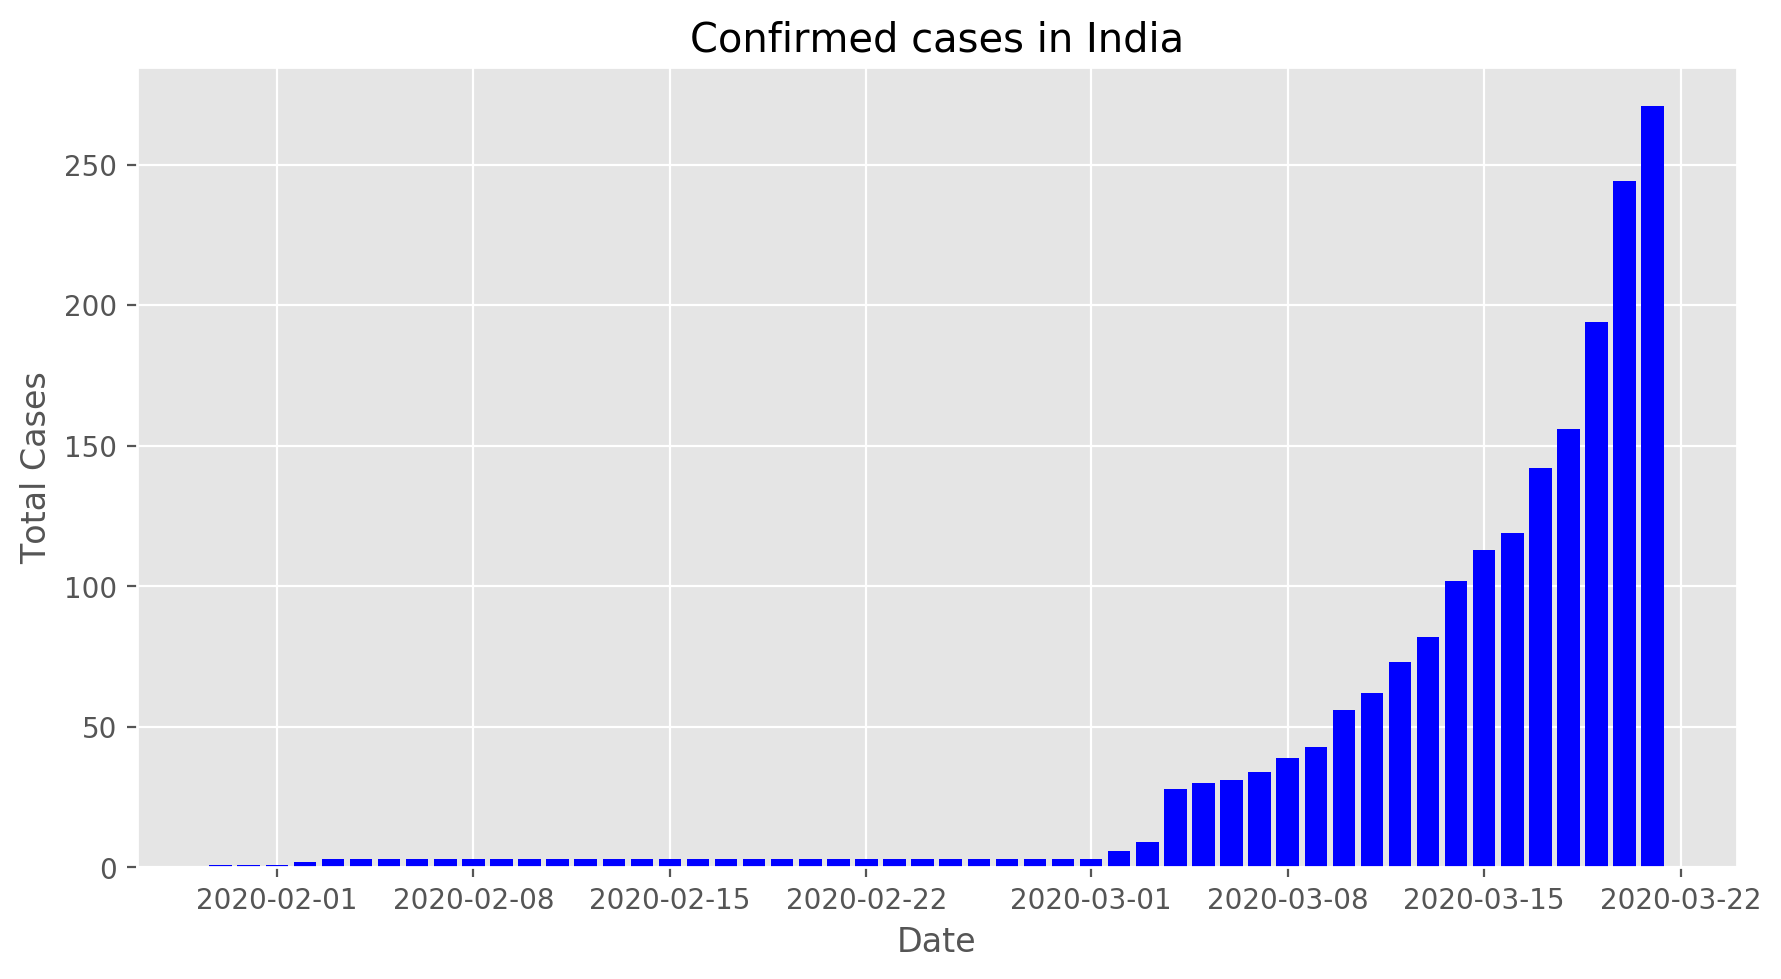

In [441]:
#Matplotlib
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(dbd_India["Date"],dbd_India["Total Cases"],color='blue')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()

#pyplot
fig=px.bar(dbd_India,x="Date",y="Total Cases",color="Total Cases",title='confirmed cases in India')
fig.show()
# color will change as per total cases

In [442]:
fig=px.bar(dbd_Korea,x="Date",y="Total Cases",color="Total Cases",title='confirmed cases in Korea')
fig.show()


In [443]:
fig=px.bar(dbd_Wuhan,x="Date",y="Total Cases",color="Total Cases",title='confirmed cases in Wuhan')
fig.show()

In [444]:
# scatter plot
fig=px.scatter(dbd_India,x="Date",y="Total Cases",color="Total Cases",title='confirmed cases in India')
fig.show()


In [445]:
fig=px.scatter(dbd_Italy,x="Date",y="Total Cases",color="Total Cases",title='confirmed cases in Italy')
fig.show()


In [446]:
fig=px.scatter(dbd_Korea,x="Date",y="Total Cases",color="Total Cases",title='confirmed cases in Korea')
fig.show()


In [447]:
fig=px.scatter(dbd_Wuhan,x="Date",y="Total Cases",color="Total Cases",title='confirmed cases in Wuhan')
fig.show()

In [448]:
dbd_India.iplot(kind='scatter',x='Date',y='Total Cases',mode='lines+markers')

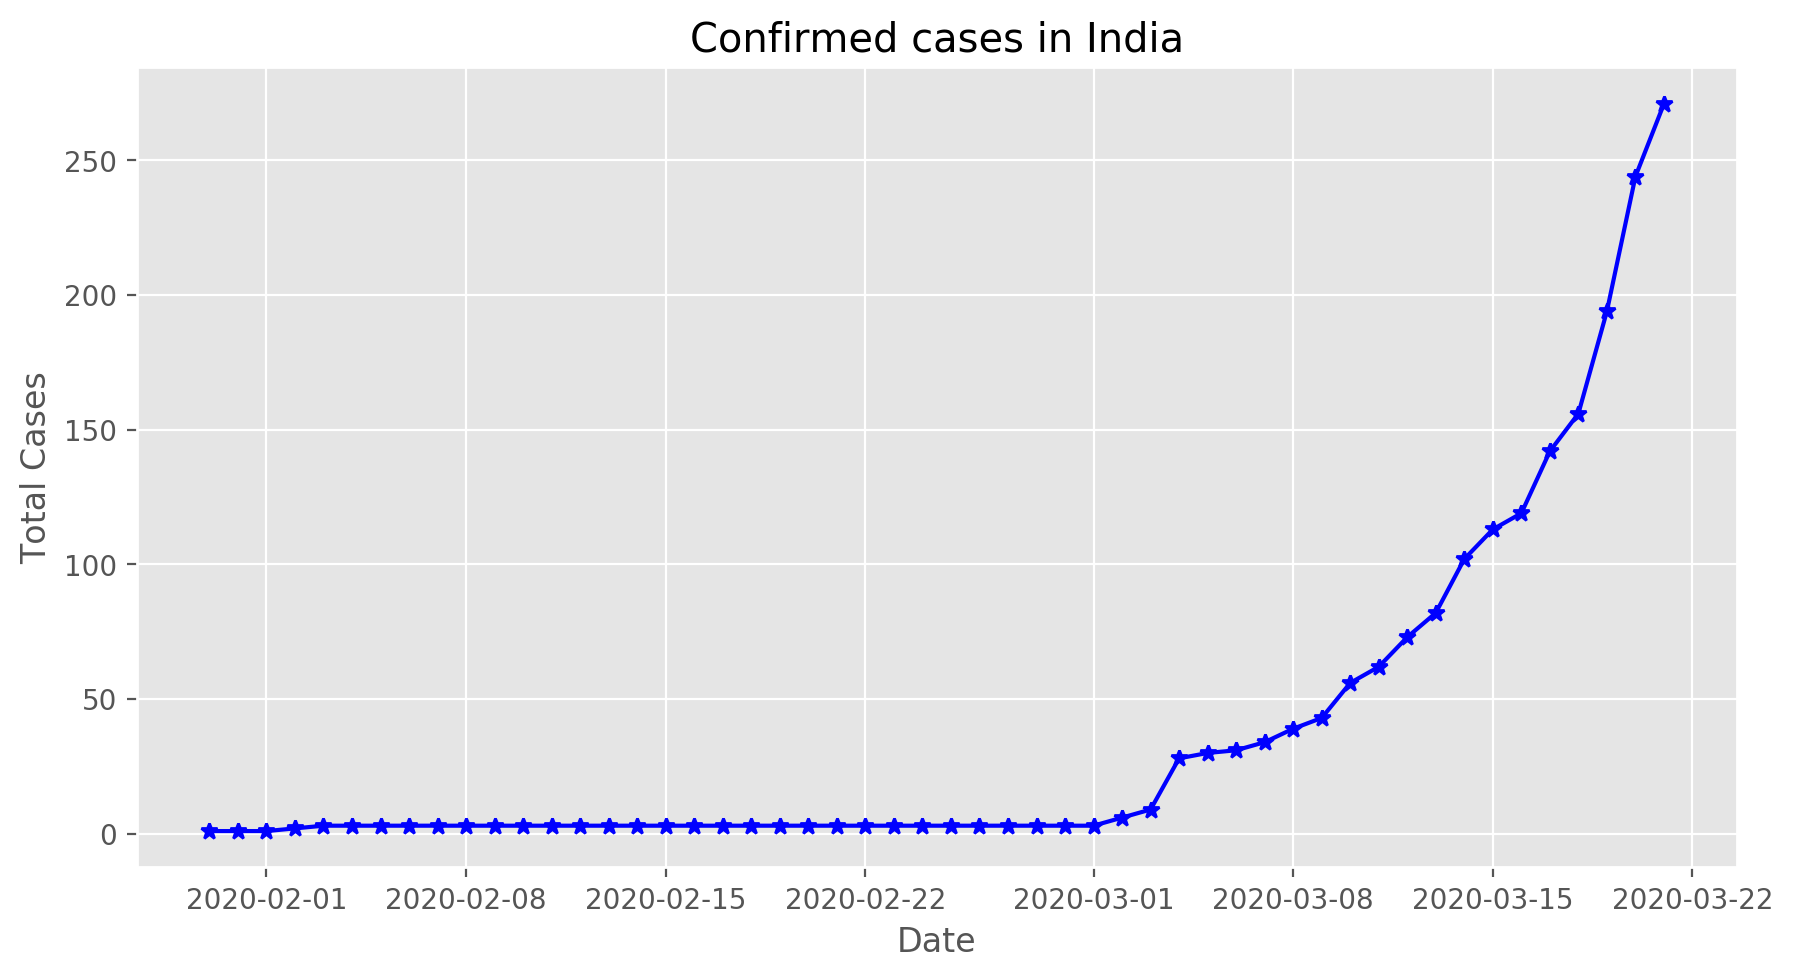

In [449]:
#Using matplotlib
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(dbd_India["Date"],dbd_India["Total Cases"],color='blue',marker='*')
axes.set_xlabel("Date")
axes.set_ylabel("Total Cases")
axes.set_title("Confirmed cases in India")
plt.show()

In [450]:
#sub plots using bar graph

from plotly.subplots import make_subplots

In [451]:
fig=make_subplots(
    rows=2,cols=2,
    specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],
    subplot_titles=("S.Korea","Italy","India","Wuhan"))
fig.add_trace(go.Bar(x=dbd_Korea['Date'],y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'],y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=dbd_India['Date'],y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=dbd_Wuhan['Date'],y=dbd_Wuhan['Total Cases'],
                    marker=dict(color=dbd_Wuhan['Total Cases'],coloraxis="coloraxis")),2,2)



fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Cases in 4 Countries")

fig.update_layout(plot_bgcolor='rgb(230,230,230)')

In [452]:
df=pd.read_csv(r"C:\Users\staff\Desktop\Staffin\Covid1-_DS\covid_19_data.csv",parse_dates=['Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [453]:
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)
df

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5885,5886,03/15/2020,Gibraltar,UK,2020-03-14 16:33:03,1.0,0.0,1.0
5886,5887,03/15/2020,NaN,Uzbekistan,2020-03-15 18:20:19,1.0,0.0,0.0
5887,5888,03/15/2020,Diamond Princess cruise ship,Australia,2020-03-14 02:33:04,0.0,0.0,0.0
5888,5889,03/15/2020,West Virginia,US,2020-03-10 02:33:04,0.0,0.0,0.0


In [454]:
df.query('Country=="India"')  #to find details about a particular country

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,2020-01-30 16:00:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,2020-01-31 23:59:00,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,2020-01-31 08:15:00,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02 06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
740,741,02/04/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
810,811,02/05/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
881,882,02/06/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
954,955,02/07/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0
1026,1027,02/08/2020,NaN,India,2020-02-03 21:43:02,3.0,0.0,0.0


In [455]:
df.groupby('Date').sum()  # The total  number of cases at a particular date 

,SNo,Confirmed,Deaths,Recovered
Date,,,,
01/22/2020,741,555.0,17.0,28.0
01/23/2020,2829,653.0,18.0,30.0
01/24/2020,4305,941.0,26.0,36.0
01/25/2020,6490,1438.0,42.0,39.0
01/26/2020,9071,2118.0,56.0,52.0
01/27/2020,12342,2927.0,82.0,61.0
01/28/2020,15262,5578.0,131.0,107.0
01/29/2020,18711,6165.0,133.0,126.0
01/30/2020,23345,8235.0,171.0,143.0


In [456]:
conf=df.groupby('Date')['Confirmed'].sum().reset_index()
conf
dea=df.groupby('Date')['Deaths'].sum().to_frame().reset_index()
rec=df.groupby('Date')['Recovered'].sum().to_frame().reset_index()



In [457]:
#fig=px.scatter(conf,x='Date',y="Confirmed")
#fig.show() 
#Above code not working
#fig=go.Figure()
#fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode='lines+markers',name='Confirmed',line=dict(color='blue',width=2)))



In [460]:
df_confirmed=pd.read_csv(r'C:\Users\staff\Desktop\Staffin\Covid1-_DS\COVID-19-Data-Analyisis-master\time_series_covid_19_confirmed.csv')
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True) 
#we renamed this beacuse in df we have "Country" instead of country region whereas in df_confirmed we have country/region. So key error occours
df_latlong=pd.merge(df,df_confirmed,on=['Country','Province/State'])
df_latlong

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,32,01/22/2020,Washington,US,2020-01-22 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
1,70,01/23/2020,Washington,US,2020-01-23 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
2,118,01/24/2020,Washington,US,2020-01-24 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
3,159,01/25/2020,Washington,US,2020-01-25 17:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
4,203,01/26/2020,Washington,US,2020-01-26 16:00:00,1.0,0.0,0.0,47.4009,-121.4905,...,0,0,0,0,0,267,366,442,568,572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,5879,03/15/2020,NaN,Saint Vincent and the Grenadines,2020-03-14 16:33:03,1.0,0.0,0.0,12.9843,-61.2872,...,0,0,0,0,0,0,0,0,0,1
3286,5625,03/14/2020,NaN,Suriname,2020-03-14 16:33:03,1.0,0.0,0.0,3.9193,-56.0278,...,0,0,0,0,0,0,0,0,0,1
3287,5881,03/15/2020,NaN,Suriname,2020-03-14 16:33:03,1.0,0.0,0.0,3.9193,-56.0278,...,0,0,0,0,0,0,0,0,0,1
3288,5628,03/14/2020,"Virgin Islands, U.S.",US,2020-03-14 16:15:18,1.0,0.0,0.0,18.3358,-64.8963,...,0,0,0,0,0,0,0,0,0,1


In [461]:
fig=px.density_mapbox(df_latlong,lat="Lat",lon="Long",hover_name="Province/State",hover_data=["Confirmed","Deaths","Recovered"],animation_frame="Date",color_continuous_scale="Portland",radius=7,zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases')
fig.update_layout(mapbox_style="open-street-map",mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})